In this notebook, we will try to predict if a ball will hit a target.  The launch velocity is fixed. There’s a wall left of the launcher where the ball bounces off. What angle should we set the launcher to to hit the target below?


We import our libraries below.

In [0]:
import math
import matplotlib.pyplot as plt
import random
import statistics

We next define a `shoot` function based on the `angle` used for shooting, which returns the distance from the target.  

Using this `shoot` we will collect `landing` data for where the launcher hits based on the angle for 3600 different angles.

In [0]:
def shoot(angle):
  xpos = 10
  ypos = 50
  force = 2.3
  gravity = -1
  xvel = force*math.cos(angle/360.0*2*math.pi)
  yvel = force*math.sin(angle/360.0*2*math.pi)
  xtarget = 20
  timestep = 0.001
  while ypos > 0:
    xpos += xvel*timestep
    ypos += yvel*timestep
    if xpos < 0: xvel = -xvel
    yvel += gravity*timestep
  return(abs(xpos-xtarget))

steps = 3600
angles = [360.0*i/steps for i in range(steps)]
landing = [shoot(angle) for angle in angles]

We plot our `landing` data relative to its `angle` below

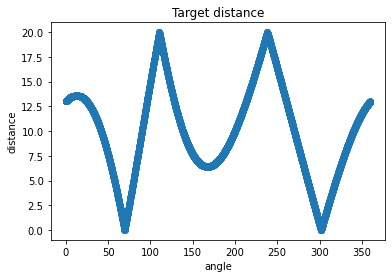

In [3]:
plt.scatter(angles, landing)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

We also can plot the location of the launcher over time, given the `angle` of the launcher, using our `show` function.

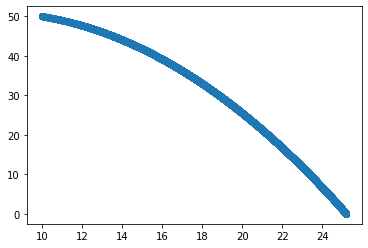

In [4]:
def show(angle):
  xpos = 10
  ypos = 50
  force = 2.3
  gravity = -1
  xvel = force*math.cos(angle/360.0*2*math.pi)
  yvel = force*math.sin(angle/360.0*2*math.pi)
  xtarget = 20
  timestep = 0.001
  xs = [xpos]
  ys = [ypos]
  while ypos > 0:
    xpos += xvel*timestep
    ypos += yvel*timestep
#    if xpos > 100: xvel = -xvel
    if xpos < 0: xvel = -xvel
    yvel += gravity*timestep
    xs += [xpos]
    ys += [ypos]
  plt.scatter(xs, ys)
  plt.show()
show(320)

We now print the angles for which the distance from the target is less than 1

In [5]:
[(angles[i],landing[i]) for i in range(len(angles)) if landing[i] < 1]

[(67.3, 0.9581107966241262),
 (67.4, 0.9132570024223341),
 (67.5, 0.8692427244451331),
 (67.6, 0.8251805020897471),
 (67.7, 0.7810704589166164),
 (67.8, 0.7369127186205127),
 (67.9, 0.6927074051183766),
 (68.0, 0.6475930472967519),
 (68.1, 0.6032966830679243),
 (68.2, 0.5589531210675887),
 (68.3, 0.5145624859466267),
 (68.4, 0.4701249025407961),
 (68.5, 0.42479754306842565),
 (68.6, 0.3802701745768857),
 (68.7, 0.335696236005937),
 (68.8, 0.2910758529399793),
 (68.9, 0.24640915110985162),
 (69.0, 0.20087201022363388),
 (69.1, 0.15611679783103227),
 (69.2, 0.11131564760778545),
 (69.3, 0.06565569391077375),
 (69.4, 0.020766804050754928),
 (69.5, 0.02416764113297276),
 (69.6, 0.06914751459909496),
 (69.7, 0.11497064111667044),
 (69.8, 0.1600372231427727),
 (69.9, 0.2051488487996771),
 (70.0, 0.2510920366673197),
 (70.1, 0.29628959275185096),
 (70.2, 0.34153180625606794),
 (70.3, 0.38759386796209583),
 (70.4, 0.4329212307189323),
 (70.5, 0.47829286309908525),
 (70.6, 0.524472606865146),
 

Here we plot our initial values for 10 random locations in our data

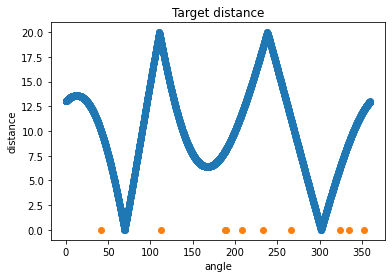

In [6]:


population = [random.randint(0,3600)/10.0 for i in range(10)]
vals = [0 for i in population]

plt.scatter(angles, landing)
plt.scatter(population, vals)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

Below we plot the true landing locations for these 10 random points in our data

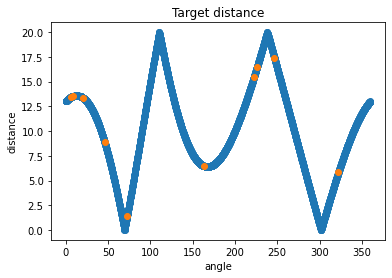

1.4017386512997518

In [0]:
vals = [shoot(ang) for ang in population]

plt.scatter(angles, landing)
plt.scatter(population, vals)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

min(vals)

Here, we select only the orange points that are less than the median distance from the target

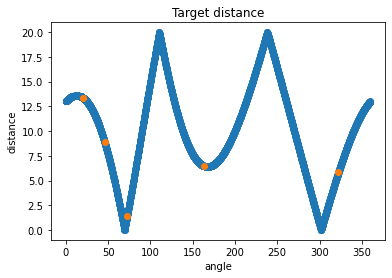

In [0]:

threshold = statistics.median(vals)

population = [population[i] for i in range(len(population)) if vals[i] <= threshold]
vals = [shoot(ang) for ang in population]

plt.scatter(angles, landing)
plt.scatter(population, vals)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

We also plot these points below the median with points less than 5 degrees away from the original points.

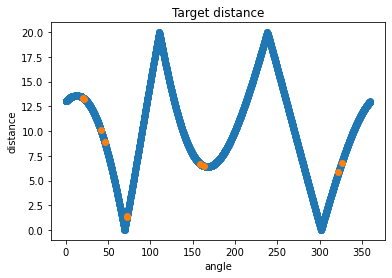

1.3287239379872418

In [0]:
kids = [ang + random.uniform(-5,5) for ang in population]
population = population + kids

vals = [shoot(ang) for ang in population]

plt.scatter(angles, landing)
plt.scatter(population, vals)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

min(vals)

Here, we declare a `traj` function wich alsl plots the trajectory over time given the angle of the launcher.

We plot the trajectories for angles 180, 60, and 280.

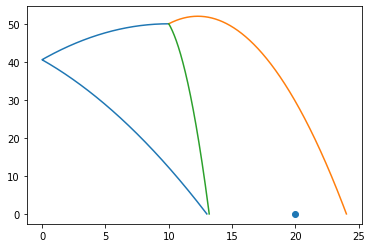

In [0]:
# animation
def traj(angle):
  xpos = 10
  ypos = 50
  force = 2.3
  gravity = -1
  xvel = force*math.cos(angle/360.0*2*math.pi)
  yvel = force*math.sin(angle/360.0*2*math.pi)
  xtarget = 20
  timestep = 0.001
  xs = [xpos]
  ys = [ypos]
  while ypos > 0:
    xpos += xvel*timestep
    ypos += yvel*timestep
#    if xpos > 100: xvel = -xvel
    if xpos < 0: xvel = -xvel
    yvel += gravity*timestep
    xs += [xpos]
    ys += [ypos]
  plt.plot(xs, ys)
  return(xpos)

# traj(15) # farthest out to the right
# traj(69) # hit target shooting up
# traj(110) # hit wall corner shooting up
# traj(165) # closest to target off wall
# traj(240) # hit wall corner shooting down
# traj(302) # hit target shooting down
traj(180)
traj(60)
traj(280)
plt.scatter([20], [0])
plt.show()

# plt.scatter(angles, landing)
# plt.scatter(population, vals)
# plt.title('Target distance')
# plt.xlabel('angle')
# plt.ylabel('distance')
# plt.show()


We now also plot trajectories for 6 additional angles, from 42 to 340 degrees.

29.92623946345737
10.0
9.92479374366168
9.980548362749733
10.0
29.981154042079705


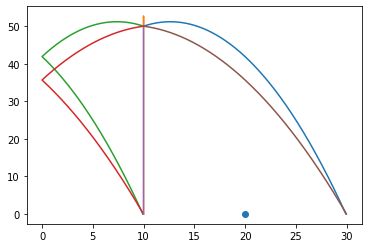

In [0]:
# 6 ways to hit a distance of 10, positions 10 and 30
print(traj(42))
print(traj(90))
print(traj(138))
print(traj(200))
print(traj(270))
print(traj(340))

plt.scatter([20], [0])
plt.show()

Here we plot 6 trajectories ranging from 49 to 331 degrees

27.935210522745976
12.014322814078753
12.028531046006776
12.058965368527211
11.91659209109362
28.000023420817755


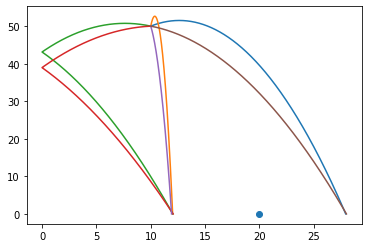

In [0]:
# 6 ways to hit a distance of 8, positions 12 and 28
print(traj(49))
print(traj(86))
print(traj(148))
print(traj(188))
print(traj(276))
print(traj(331))

plt.scatter([20], [0])
plt.show()



Below is a plot of 3 different trajectories from 168 to 170 degrees.

13.574261258781135
13.601832910181503
13.58981060986924


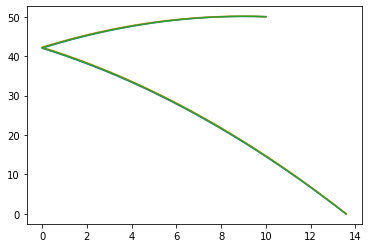

In [0]:
print(traj(170))
print(traj(168))
print(traj(169))